In [17]:
# CICIDS2017 Dataset Exploration - Friday-WorkingHours-Morning.pcap_ISCX

# Cell 1: Import Libraries and Setup Paths
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import warnings
warnings.filterwarnings('ignore')

# Set chart style
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Define paths
data_dir = '/root/autodl-tmp/projects/DL/dataset/extracted/MachineLearningCVE'
# Get all CSV files
csv_files = glob(os.path.join(data_dir, "*.csv"))

In [18]:
# Cell 2: Select File for Analysis - Friday-WorkingHours-Morning.pcap_ISCX
selected_file = os.path.join(data_dir, "Friday-WorkingHours-Morning.pcap_ISCX.csv")

def load_and_explore_file(file_path):
    """Load and explore a single CSV file"""
    print(f"\nAnalyzing file: {os.path.basename(file_path)}")
    
    # Try different encodings
    encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
    df = None
    
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"Successfully loaded using {encoding} encoding")
            break
        except:
            continue
    
    if df is None:
        print("Unable to read file, please check file path or format")
        return None
    
    # Basic information
    print("\nBasic data information:")
    print(f"Data shape: {df.shape} (rows × columns)")
    print(f"Number of columns: {len(df.columns)}")
    
    return df

# Load selected file
df = load_and_explore_file(selected_file)


Analyzing file: Friday-WorkingHours-Morning.pcap_ISCX.csv
Successfully loaded using utf-8 encoding

Basic data information:
Data shape: (191033, 79) (rows × columns)
Number of columns: 79


In [19]:
# Cell 3: Data Preview
# Display first few rows
print("First 5 rows of data:")
df.head()

First 5 rows of data:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [20]:
# Cell 4: Data Types and Basic Statistics
# Display data types
print("\nData type information:")
df.dtypes

# Basic statistics for numerical columns
print("\nNumerical column statistics summary:")
df.describe()


Data type information:

Numerical column statistics summary:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,191033.000000,1.910330e+05,191033.000000,191033.000000,1.910330e+05,1.910330e+05,191033.000000,191033.000000,191033.000000,191033.000000,...,191033.000000,191033.000000,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05
mean,6756.069988,1.164499e+07,13.826548,16.413714,5.999468e+02,2.838565e+04,174.715803,23.897646,51.877418,50.194023,...,10.323735,25.585407,8.596271e+04,5.382912e+04,1.834991e+05,5.589691e+04,3.917041e+06,1.750674e+05,4.048164e+06,3.745754e+06
std,16697.438823,3.070084e+07,1097.755533,1479.792387,7.924198e+03,3.314538e+06,554.475223,41.909942,117.031845,160.454532,...,1046.038121,6.380665,8.681320e+05,4.929487e+05,1.333719e+06,7.628561e+05,1.388267e+07,2.167443e+06,1.424123e+07,1.370477e+07
min,0.000000,-1.200000e+01,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.940000e+02,2.000000,1.000000,4.000000e+01,6.000000e+00,30.000000,0.000000,15.714286,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.112100e+04,2.000000,2.000000,7.000000e+01,1.520000e+02,42.000000,23.000000,38.112360,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,4.102840e+05,4.000000,2.000000,1.520000e+02,3.440000e+02,64.000000,42.000000,51.000000,20.124612,...,2.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,64948.000000,1.200000e+08,207964.000000,284602.000000,1.235152e+06,6.270000e+08,24820.000000,2325.000000,5940.857143,7049.469004,...,198636.000000,56.000000,1.060000e+08,5.040000e+07,1.060000e+08,1.060000e+08,1.200000e+08,7.660000e+07,1.200000e+08,1.200000e+08



Missing values:
Flow Bytes/s    28
dtype: int64


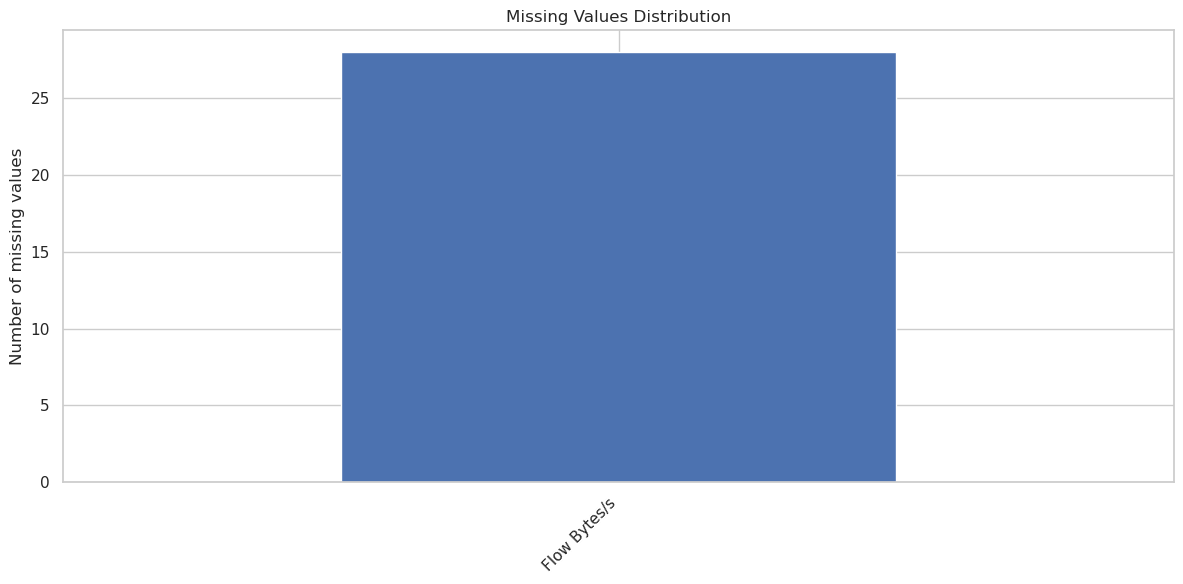


Columns with infinite values:
- Flow Bytes/s: positive infinity: 94, negative infinity: 0
-  Flow Packets/s: positive infinity: 122, negative infinity: 0


In [21]:
# Cell 5: Check Missing and Infinite Values
# Check missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if len(missing_values) > 0:
    print("\nMissing values:")
    print(missing_values)
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    missing_values.plot(kind='bar')
    plt.title('Missing Values Distribution')
    plt.ylabel('Number of missing values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found")

# Check infinite values
def check_infinite_values(df):
    """Check for infinite values"""
    inf_count = {}
    
    for col in df.select_dtypes(include=[np.number]).columns:
        pos_inf = (df[col] == np.inf).sum()
        neg_inf = (df[col] == -np.inf).sum()
        
        if pos_inf > 0 or neg_inf > 0:
            inf_count[col] = {'positive_inf': pos_inf, 'negative_inf': neg_inf}
    
    return inf_count

inf_values = check_infinite_values(df)

if inf_values:
    print("\nColumns with infinite values:")
    for col, counts in inf_values.items():
        print(f"- {col}: positive infinity: {counts['positive_inf']}, negative infinity: {counts['negative_inf']}")
else:
    print("\nNo infinite values found")


Label distribution:
BENIGN    189067
Bot         1966
Name:  Label, dtype: int64


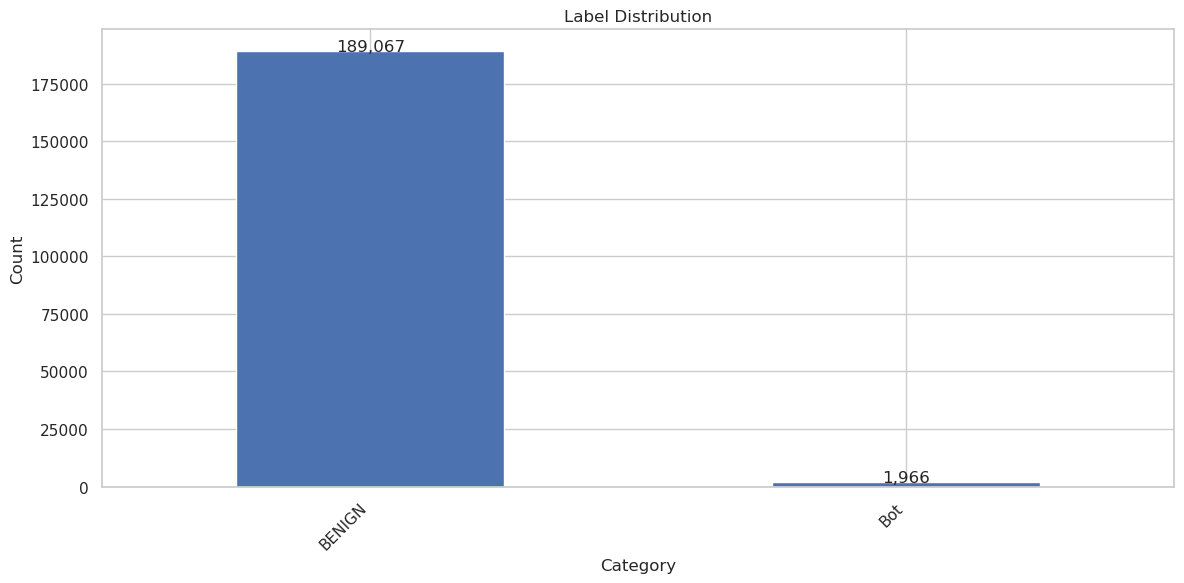

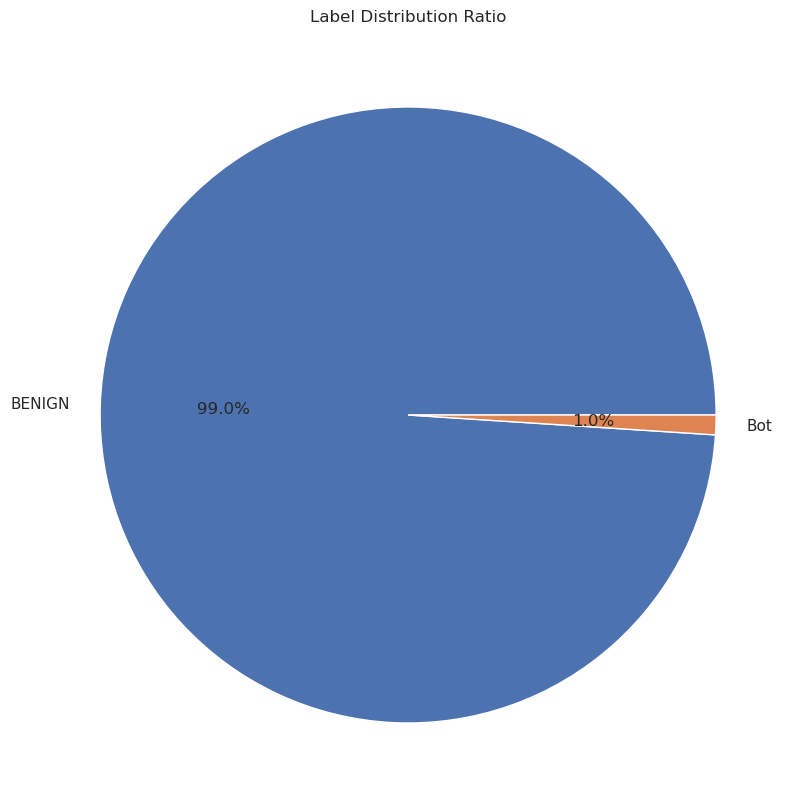

In [22]:
# Cell 6: Label Distribution Analysis
# Check if Label column exists
if ' Label' in df.columns:
    print("\nLabel distribution:")
    label_counts = df[' Label'].value_counts()
    print(label_counts)
    
    # Visualize label distribution
    plt.figure(figsize=(12, 6))
    label_counts.plot(kind='bar')
    plt.title('Label Distribution')
    plt.ylabel('Count')
    plt.xlabel('Category')
    plt.xticks(rotation=45, ha='right')
    
    # Show values on bars
    for i, v in enumerate(label_counts):
        plt.text(i, v + 10, f"{v:,}", ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Pie chart showing label distribution
    plt.figure(figsize=(10, 10))
    label_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Label Distribution Ratio')
    plt.ylabel('')
    plt.show()
else:
    print("\nStandard label column not found")


Only selecting the first 15 numerical features for correlation analysis (total 78)

Feature correlation analysis:


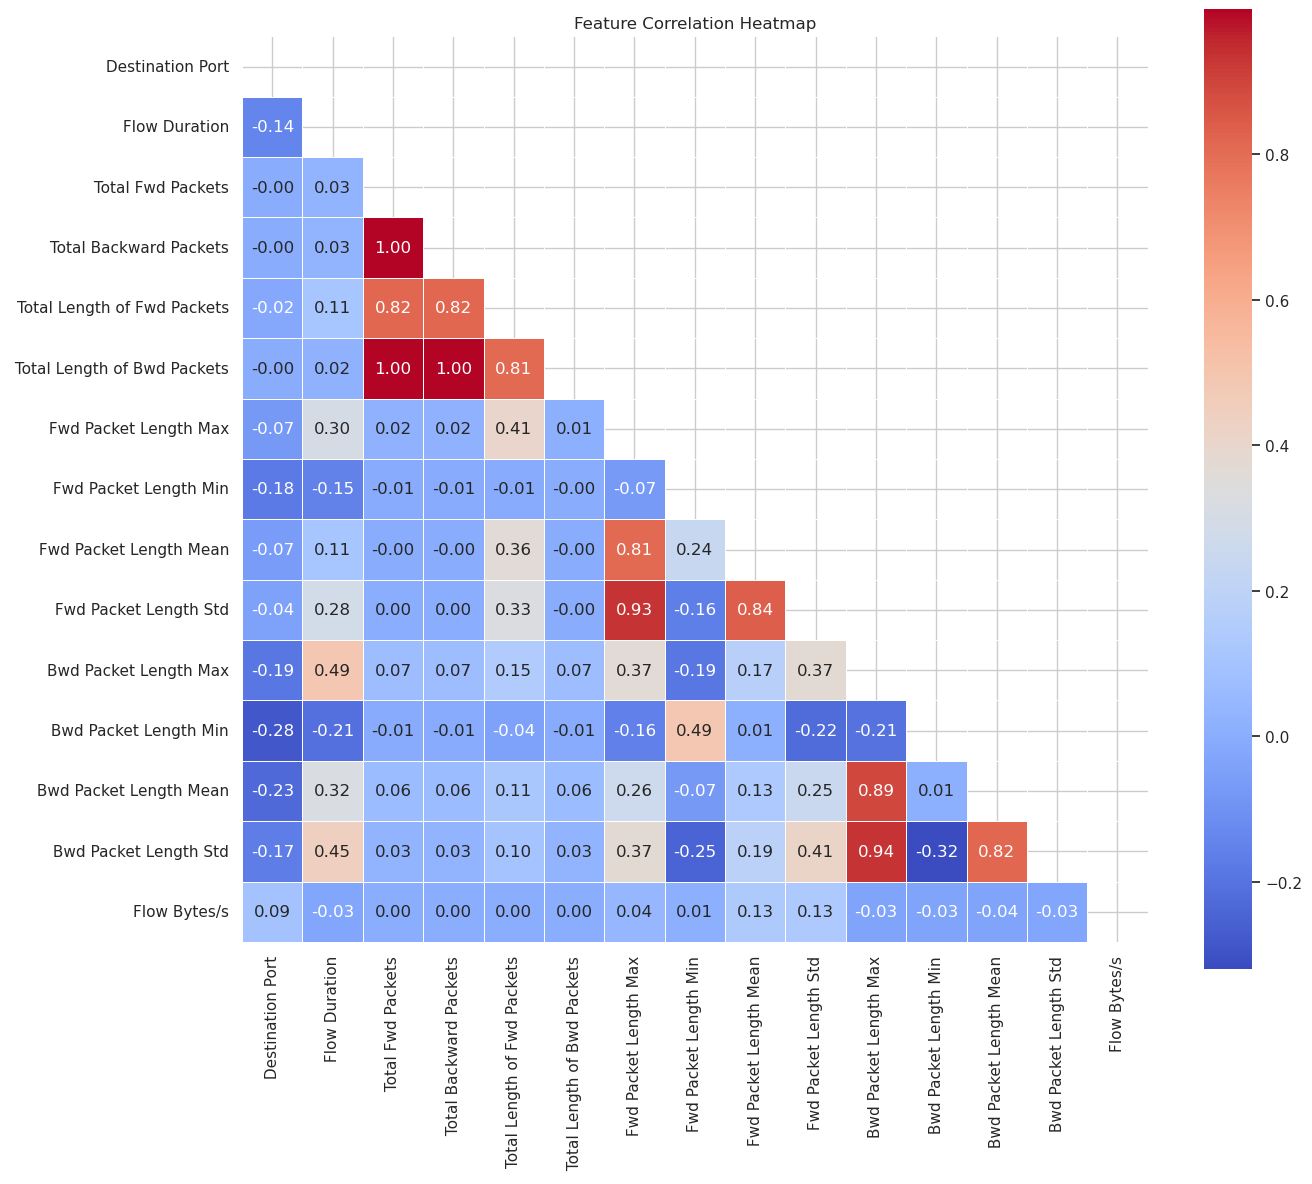


Highly correlated feature pairs (|correlation coefficient| > 0.8):
-  Total Fwd Packets and  Total Backward Packets: 1.00
-  Total Fwd Packets and Total Length of Fwd Packets: 0.82
-  Total Fwd Packets and  Total Length of Bwd Packets: 1.00
-  Total Backward Packets and Total Length of Fwd Packets: 0.82
-  Total Backward Packets and  Total Length of Bwd Packets: 1.00
- Total Length of Fwd Packets and  Total Length of Bwd Packets: 0.81
-  Fwd Packet Length Max and  Fwd Packet Length Mean: 0.81
-  Fwd Packet Length Max and  Fwd Packet Length Std: 0.93
-  Fwd Packet Length Mean and  Fwd Packet Length Std: 0.84
- Bwd Packet Length Max and  Bwd Packet Length Mean: 0.89
- Bwd Packet Length Max and  Bwd Packet Length Std: 0.94
-  Bwd Packet Length Mean and  Bwd Packet Length Std: 0.82


In [23]:
# Cell 7: Feature Correlation Analysis
# Select numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# If too many numerical features, select only a subset
if len(numeric_cols) > 15:
    print(f"\nOnly selecting the first 15 numerical features for correlation analysis (total {len(numeric_cols)})")
    numeric_cols = numeric_cols[:15]

# Calculate correlation matrix
if len(numeric_cols) > 1:
    print("\nFeature correlation analysis:")
    corr = df[numeric_cols].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
               square=True, linewidths=.5)
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated features
    high_corr = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            if abs(corr.iloc[i, j]) > 0.8:
                high_corr.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))
    
    if high_corr:
        print("\nHighly correlated feature pairs (|correlation coefficient| > 0.8):")
        for feat1, feat2, corr_val in high_corr:
            print(f"- {feat1} and {feat2}: {corr_val:.2f}")



Feature distribution analysis:


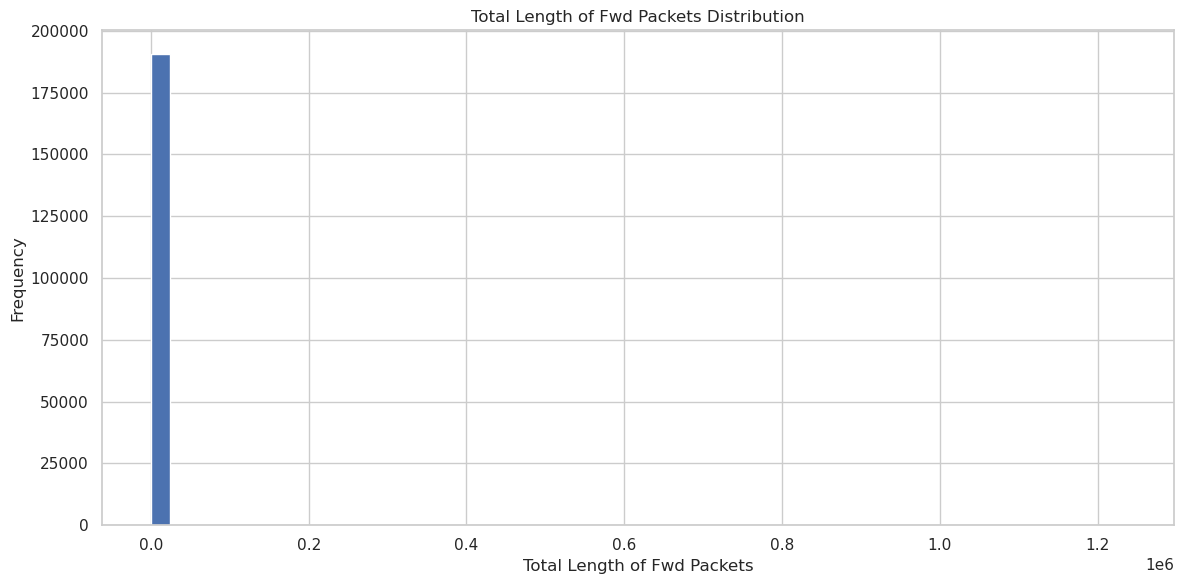

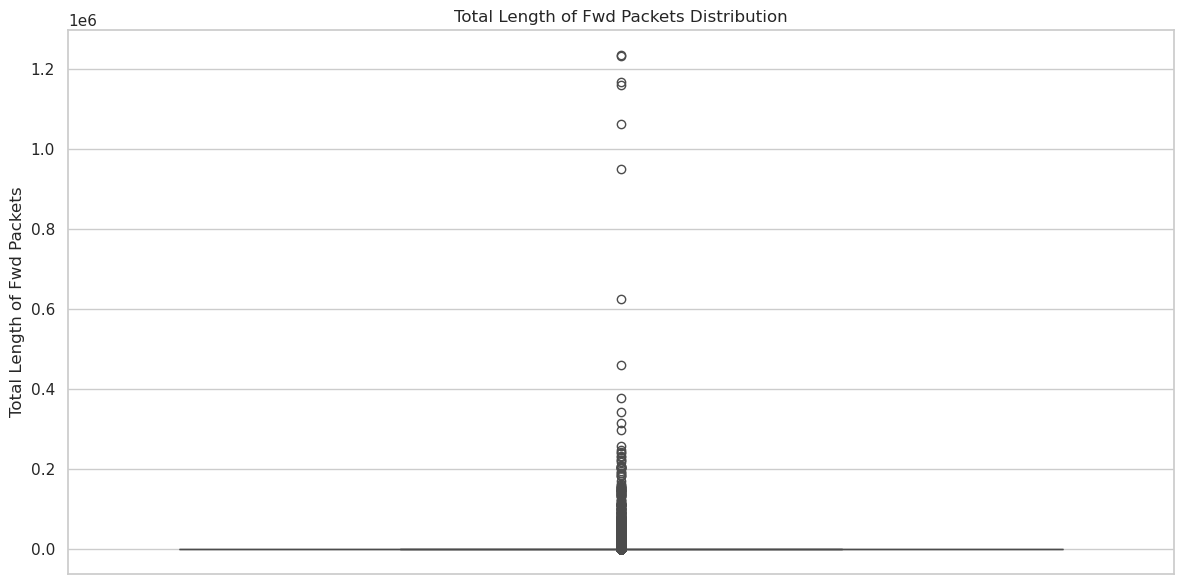

In [24]:
# Cell 8: Feature Distribution Analysis
# Select important numerical features for distribution analysis
important_features = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
                     'Total Length of Fwd Packets', 'Total Length of Bwd Packets']

# Ensure these features exist
available_features = [f for f in important_features if f in df.columns]

# If predefined important features aren't found, select first few numerical features
if not available_features and len(numeric_cols) > 0:
    available_features = numeric_cols[:5]  # Only take first 5

if available_features:
    print("\nFeature distribution analysis:")
    
    # Plot histograms
    for feature in available_features:
        plt.figure(figsize=(12, 6))
        
        # Normal data distribution (if Label column exists)
        if 'Label' in df.columns:
            normal_data = df[df['Label'] == 'BENIGN'][feature]
            attack_data = df[df['Label'] != 'BENIGN'][feature]
            
            plt.hist(normal_data, bins=50, alpha=0.5, label='normal')
            plt.hist(attack_data, bins=50, alpha=0.5, label='attack')
            plt.legend()
        else:
            plt.hist(df[feature], bins=50)
        
        plt.title(f'{feature} Distribution')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
        
        # Box plots
        plt.figure(figsize=(12, 6))
        if 'Label' in df.columns:
            sns.boxplot(x='Label', y=feature, data=df)
            plt.title(f'{feature} Distribution Across Categories')
            plt.xticks(rotation=45, ha='right')
        else:
            sns.boxplot(y=feature, data=df)
            plt.title(f'{feature} Distribution')
        plt.tight_layout()
        plt.show()